# Dados e Aprendizagem Automática
## Produção Energética e Sustentabilidade


**Dataset:** .csv

**Problema:** Prever a quantidade de energia, em kWh, produzida por painéis solares e injectada, em redes elétricas, a cada hora do dia.
___
**Features dos Datasets de Energia:**

* Data - o timestamp associado ao registo, ao dia;
* Hora - a hora associada ao registo;
* Normal (kWh) - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado normal em ciclos bi-horário diários (horas fora de vazio);
* Horário Económico (kWh) - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado económico em ciclos bi-horário diários (horas de vazio);
* Autoconsumo (kWh) - quantidade de energia eléctrica consumida, em kWh, proveniente dos painéis solares;
* Injeção na rede (kWh) - quantidade de energia eléctrica injectada na rede eléctrica, em kWh, proveniente dos painéis solares.

**Features dos Datasets Meteorológicos:**

* dt - o timestamp associado ao registo;
* dt_iso - a data associada ao registo, ao segundo;
* city_name - o local em causa;
* temp - temperatura em ºC;
* feels_like - sensação térmica em ºC;
* temp_min - temperatura mínima sentida em ºC;
* temp_max - temperatura máxima sentida em ºC;
* pressure - pressão atmosférica sentida em atm;
* sea_level - pressão atmosférica sentida ao nível do mar em atm;
* grnd_level - pressão atmosférica sentida à altitude local em atm;
* humidity - humidade em percentagem;
* wind_speed - velocidade do vento em metros por segundo;
* rain_1h - valor médio de precipitação;
* clouds_all - nível de nebulosidade em percentagem;
* weather_description - avaliação qualitativa do estado do tempo.

___
**Grupo:**
- João Paulo Machado Abreu - pg53928
- João Pedro Dias Faria - pg53939
- Ricardo Cardoso Sousa - pg54179
- Rui Pedro Guise da Silva - pg54213


### Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone
%matplotlib inline

##### Concat dos dois datasets para treino da energia

In [2]:
df2021 = pd.read_csv('./datasets/competicao/energia_202109-202112.csv')
df2022 = pd.read_csv('./datasets/competicao/energia_202201-202212.csv')

df_energia_train = pd.concat([df2021, df2022], ignore_index=True)
df_energia_teste = pd.read_csv('./datasets/competicao/energia_202301-202304.csv')

In [3]:
df2021.info()
df2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injeção na rede (kWh)    566 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 105.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     8760 non-null   object 
 1   Hora                     8760 non-null   int64  
 2   Normal (kWh)             8760 non-null   float64
 3   Horário Económico

In [4]:
df_energia_train.info()
df_energia_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horário Económico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injeção na rede (kWh)    3239 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 516.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económi

##### Adicionar uma coluna com o timestamp em segundos

In [5]:
df_energia_train['dt'] = pd.to_datetime(df_energia_train['Data'] + ' ' + df_energia_train['Hora'].astype(str) + ':00:00', format='%Y-%m-%d %H:%M:%S')
df_energia_teste['dt'] = pd.to_datetime(df_energia_teste['Data'] + ' ' + df_energia_teste['Hora'].astype(str) + ':00:00', format='%Y-%m-%d %H:%M:%S')

def create_timestamp(row):
    timestamp_str = str(row['dt'])
    timestamp= datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
    timestamp_utc = timestamp.replace(tzinfo=timezone.utc)
    return int(timestamp_utc.timestamp())

df_energia_train['dt'] = df_energia_train.apply(create_timestamp, axis=1)
df_energia_teste['dt'] = df_energia_teste.apply(create_timestamp, axis=1)

In [6]:
df_energia_train.info()
df_energia_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horário Económico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injeção na rede (kWh)    3239 non-null   object 
 6   dt                       11016 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 602.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)   

##### Concat dos dois datasets para treino da meteorologia

In [7]:
dfm2021 = pd.read_csv('./datasets/competicao/meteo_202109-202112.csv')
dfm2022 = pd.read_csv('./datasets/competicao/meteo_202201-202212.csv')

df_meteo_train = pd.concat([dfm2021, dfm2022], ignore_index=True)
df_meteo_teste = pd.read_csv('./datasets/competicao/meteo_202301-202304.csv')

In [8]:
df_meteo_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   1752 non-null   int64  
 1   dt_iso               1752 non-null   object 
 2   city_name            1752 non-null   object 
 3   temp                 1752 non-null   float64
 4   feels_like           1752 non-null   float64
 5   temp_min             1752 non-null   float64
 6   temp_max             1752 non-null   float64
 7   pressure             1752 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             1752 non-null   int64  
 11  wind_speed           1752 non-null   float64
 12  rain_1h              206 non-null    float64
 13  clouds_all           1752 non-null   int64  
 14  weather_description  1752 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

In [9]:
df_energia_train['dt'].describe()

count    1.101600e+04
mean     1.652701e+09
std      1.144868e+07
min      1.632874e+09
25%      1.642787e+09
50%      1.652701e+09
75%      1.662614e+09
max      1.672528e+09
Name: dt, dtype: float64

In [10]:
df_meteo_train['dt'].describe()

count    1.168800e+04
mean     1.651491e+09
std      1.214705e+07
min      1.630454e+09
25%      1.640973e+09
50%      1.651491e+09
75%      1.662009e+09
max      1.672528e+09
Name: dt, dtype: float64

In [11]:
df_energia_teste['dt'].describe()

count    2.256000e+03
mean     1.676590e+09
std      2.345024e+06
min      1.672531e+09
25%      1.674561e+09
50%      1.676590e+09
75%      1.678620e+09
max      1.680649e+09
Name: dt, dtype: float64

In [12]:
df_meteo_teste['dt'].describe()

count    1.752000e+03
mean     1.675683e+09
std      1.821251e+06
min      1.672531e+09
25%      1.674107e+09
50%      1.675683e+09
75%      1.677259e+09
max      1.678835e+09
Name: dt, dtype: float64

##### Join do dataset de energia com o de meteorologia

In [13]:
df_train = pd.merge(df_energia_train, df_meteo_train, left_on='dt', right_on='dt', how='inner')

df_teste = pd.merge(df_energia_teste, df_meteo_teste, left_on='dt', right_on='dt', how='left')

In [14]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   dt                       2256 non-null   int64  
 6   dt_iso                   1752 non-null   object 
 7   city_name                1752 non-null   object 
 8   temp                     1752 non-null   float64
 9   feels_like               1752 non-null   float64
 10  temp_min                 1752 non-null   float64
 11  temp_max                 1752 non-null   float64
 12  pressure                 1752 non-null   float64
 13  sea_level                0 non-null      float64
 14  grnd_level              

### Exploração e Visualização dos dados

In [15]:
df_train.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),dt,dt_iso,city_name,temp,...,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-29,0,0.0,0.0,0.0,NaN,1632873600,2021-09-29 00:00:00 +0000 UTC,local,13.97,...,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds
1,2021-09-29,1,0.0,0.0,0.0,NaN,1632877200,2021-09-29 01:00:00 +0000 UTC,local,13.48,...,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds
2,2021-09-29,2,0.0,0.0,0.0,NaN,1632880800,2021-09-29 02:00:00 +0000 UTC,local,12.93,...,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds
3,2021-09-29,3,0.0,0.0,0.0,NaN,1632884400,2021-09-29 03:00:00 +0000 UTC,local,12.61,...,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds
4,2021-09-29,4,0.0,0.0,0.0,NaN,1632888000,2021-09-29 04:00:00 +0000 UTC,local,12.61,...,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horário Económico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injeção na rede (kWh)    3239 non-null   object 
 6   dt                       11016 non-null  int64  
 7   dt_iso                   11016 non-null  object 
 8   city_name                11016 non-null  object 
 9   temp                     11016 non-null  float64
 10  feels_like               11016 non-null  float64
 11  temp_min                 11016 non-null  float64
 12  temp_max                 11016 non-null  float64
 13  pressure                 11016 non-null  int64  
 14  sea_level             

<Axes: >

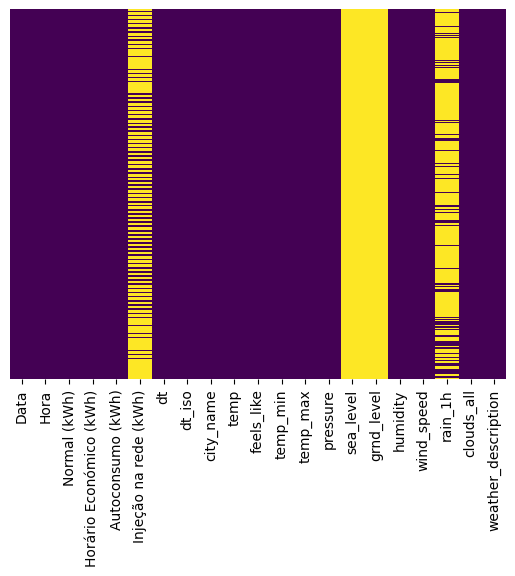

In [17]:
sns.heatmap(df_train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

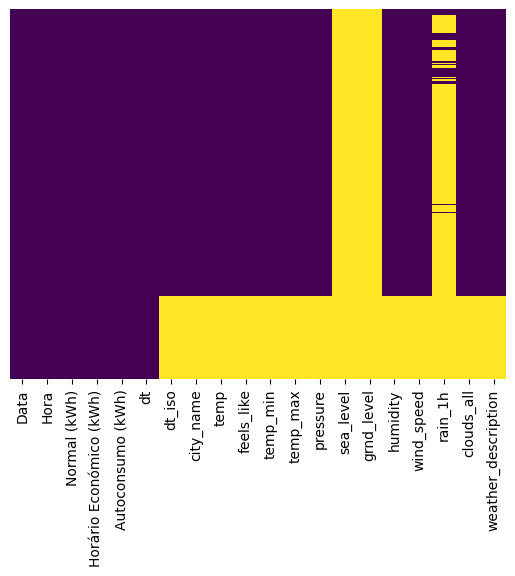

In [18]:
sns.heatmap(df_teste.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [19]:
print(df_train.isna().sum())

Data                           0
Hora                           0
Normal (kWh)                   0
Horário Económico (kWh)        0
Autoconsumo (kWh)              0
Injeção na rede (kWh)       7777
dt                             0
dt_iso                         0
city_name                      0
temp                           0
feels_like                     0
temp_min                       0
temp_max                       0
pressure                       0
sea_level                  11016
grnd_level                 11016
humidity                       0
wind_speed                     0
rain_1h                     8732
clouds_all                     0
weather_description            0
dtype: int64


In [20]:
print(df_teste.isna().sum())

Data                          0
Hora                          0
Normal (kWh)                  0
Horário Económico (kWh)       0
Autoconsumo (kWh)             0
dt                            0
dt_iso                      504
city_name                   504
temp                        504
feels_like                  504
temp_min                    504
temp_max                    504
pressure                    504
sea_level                  2256
grnd_level                 2256
humidity                    504
wind_speed                  504
rain_1h                    2050
clouds_all                  504
weather_description         504
dtype: int64


#### Drop de colunas

Vamos remover as colunas sea_level e grnd_level devido as mesmas não conterem dados.
Vamos remover as colunas dt_iso e dt por não conterem dados essenciais para o problema

In [21]:
# Estou a colocar num dataframe diferente para não estragar o inicial
df_train_v1 = df_train.copy()
df_train_v1.drop(['sea_level'], axis=1, inplace=True)
df_train_v1.drop(['grnd_level'], axis=1, inplace=True)
df_train_v1.drop(['dt'], axis=1, inplace=True)
df_train_v1.drop(['dt_iso'], axis=1, inplace=True)
df_train_v1.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-29,0,0.0,0.0,0.0,NaN,local,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,overcast clouds
1,2021-09-29,1,0.0,0.0,0.0,NaN,local,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,overcast clouds
2,2021-09-29,2,0.0,0.0,0.0,NaN,local,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,overcast clouds
3,2021-09-29,3,0.0,0.0,0.0,NaN,local,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,overcast clouds
4,2021-09-29,4,0.0,0.0,0.0,NaN,local,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,overcast clouds


In [22]:
# Estou a colocar num dataframe diferente para não estragar o inicial
df_teste_v1 = df_teste.copy()
df_teste_v1.drop(['sea_level'], axis=1, inplace=True)
df_teste_v1.drop(['grnd_level'], axis=1, inplace=True)
df_teste_v1.drop(['dt'], axis=1, inplace=True)
df_teste_v1.drop(['dt_iso'], axis=1, inplace=True)
df_teste_v1.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2023-01-01,0,0.0,0.467,0.0,local,12.93,12.76,12.72,13.43,1019.0,95.0,2.02,3.72,100.0,moderate rain
1,2023-01-01,1,0.0,0.577,0.0,local,13.49,13.38,13.43,13.90,1018.0,95.0,2.18,3.26,100.0,moderate rain
2,2023-01-01,2,0.0,0.346,0.0,local,13.55,13.44,13.48,14.82,1017.0,95.0,2.88,2.44,100.0,moderate rain
3,2023-01-01,3,0.0,0.270,0.0,local,13.61,13.51,12.01,14.82,1016.0,95.0,3.63,1.74,100.0,moderate rain
4,2023-01-01,4,0.0,0.252,0.0,local,13.59,13.49,12.01,14.82,1015.0,95.0,4.58,1.13,100.0,moderate rain


In [23]:
df_train_v1.nunique()

Data                        459
Hora                         24
Normal (kWh)               1282
Horário Económico (kWh)     851
Autoconsumo (kWh)           752
Injeção na rede (kWh)         4
city_name                     1
temp                       2382
feels_like                 2670
temp_min                    481
temp_max                    545
pressure                     41
humidity                     82
wind_speed                  771
rain_1h                     367
clouds_all                  101
weather_description           8
dtype: int64

In [24]:
df_teste_v1.nunique()

Data                         94
Hora                         24
Normal (kWh)                709
Horário Económico (kWh)     490
Autoconsumo (kWh)           485
city_name                     1
temp                        889
feels_like                 1007
temp_min                    169
temp_max                    174
pressure                     31
humidity                     71
wind_speed                  512
rain_1h                     120
clouds_all                   99
weather_description           8
dtype: int64

Vamos remover a coluna city_name por a mesma apresentar apenas um valor único, não interessante para o dataset

In [25]:
df_train_v1.drop('city_name', axis=1, inplace=True)
df_teste_v1.drop('city_name', axis=1, inplace=True)
df_train_v1.columns

Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description'],
      dtype='object')

### Lidar com datas

In [26]:
df_train_v1['Data'].head()

0    2021-09-29
1    2021-09-29
2    2021-09-29
3    2021-09-29
4    2021-09-29
Name: Data, dtype: object

In [27]:
df_train_v1['Data'] = pd.to_datetime(df_train_v1['Data'], format='%Y-%m-%d', errors='coerce')
df_teste_v1['Data'] = pd.to_datetime(df_teste_v1['Data'], format='%Y-%m-%d', errors='coerce')

In [28]:
df_train_v1['date_year'] = df_train_v1['Data'].dt.year
df_train_v1['date_month'] = df_train_v1['Data'].dt.month
df_train_v1['date_day'] = df_train_v1['Data'].dt.day
df_train_v1['date_hour'] = df_train_v1['Hora']
df_train_v1.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,date_year,date_month,date_day,date_hour
0,2021-09-29,0,0.0,0.0,0.0,NaN,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,overcast clouds,2021,9,29,0
1,2021-09-29,1,0.0,0.0,0.0,NaN,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,overcast clouds,2021,9,29,1
2,2021-09-29,2,0.0,0.0,0.0,NaN,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,overcast clouds,2021,9,29,2
3,2021-09-29,3,0.0,0.0,0.0,NaN,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,overcast clouds,2021,9,29,3
4,2021-09-29,4,0.0,0.0,0.0,NaN,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,overcast clouds,2021,9,29,4


In [29]:
df_teste_v1['date_year'] = df_teste_v1['Data'].dt.year
df_teste_v1['date_month'] = df_teste_v1['Data'].dt.month
df_teste_v1['date_day'] = df_teste_v1['Data'].dt.day
df_teste_v1['date_hour'] = df_teste_v1['Hora']
df_teste_v1.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,date_year,date_month,date_day,date_hour
0,2023-01-01,0,0.0,0.467,0.0,12.93,12.76,12.72,13.43,1019.0,95.0,2.02,3.72,100.0,moderate rain,2023,1,1,0
1,2023-01-01,1,0.0,0.577,0.0,13.49,13.38,13.43,13.90,1018.0,95.0,2.18,3.26,100.0,moderate rain,2023,1,1,1
2,2023-01-01,2,0.0,0.346,0.0,13.55,13.44,13.48,14.82,1017.0,95.0,2.88,2.44,100.0,moderate rain,2023,1,1,2
3,2023-01-01,3,0.0,0.270,0.0,13.61,13.51,12.01,14.82,1016.0,95.0,3.63,1.74,100.0,moderate rain,2023,1,1,3
4,2023-01-01,4,0.0,0.252,0.0,13.59,13.49,12.01,14.82,1015.0,95.0,4.58,1.13,100.0,moderate rain,2023,1,1,4


In [30]:
df_train_v1.drop('Data', axis=1, inplace=True)
df_train_v1.drop('Hora', axis=1, inplace=True)

In [31]:
df_teste_v1.drop('Data', axis=1, inplace=True)
df_teste_v1.drop('Hora', axis=1, inplace=True)

In [32]:
df_train_v1.nunique()

Normal (kWh)               1282
Horário Económico (kWh)     851
Autoconsumo (kWh)           752
Injeção na rede (kWh)         4
temp                       2382
feels_like                 2670
temp_min                    481
temp_max                    545
pressure                     41
humidity                     82
wind_speed                  771
rain_1h                     367
clouds_all                  101
weather_description           8
date_year                     2
date_month                   12
date_day                     31
date_hour                    24
dtype: int64

In [33]:
df_teste_v1.nunique()

Normal (kWh)                709
Horário Económico (kWh)     490
Autoconsumo (kWh)           485
temp                        889
feels_like                 1007
temp_min                    169
temp_max                    174
pressure                     31
humidity                     71
wind_speed                  512
rain_1h                     120
clouds_all                   99
weather_description           8
date_year                     1
date_month                    4
date_day                     31
date_hour                    24
dtype: int64

In [36]:
df_train_v1['date_month'].unique()

array([ 9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int32)

In [37]:
df_teste_v1['date_month'].unique()

array([1, 2, 3, 4], dtype=int32)

### Tratamento de dados categóricos
coluna 'weather_description'

In [38]:
df_train_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    3239 non-null   object 
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   pressure                 11016 non-null  int64  
 9   humidity                 11016 non-null  int64  
 10  wind_speed               11016 non-null  float64
 11  rain_1h                  2284 non-null   float64
 12  clouds_all               11016 non-null  int64  
 13  weather_description      11016 non-null  object 
 14  date_year             

In [39]:
df_train_v1['weather_description'].value_counts()

weather_description
sky is clear            3010
overcast clouds         2430
light rain              1662
broken clouds           1413
scattered clouds        1148
few clouds               731
moderate rain            562
heavy intensity rain      60
Name: count, dtype: int64

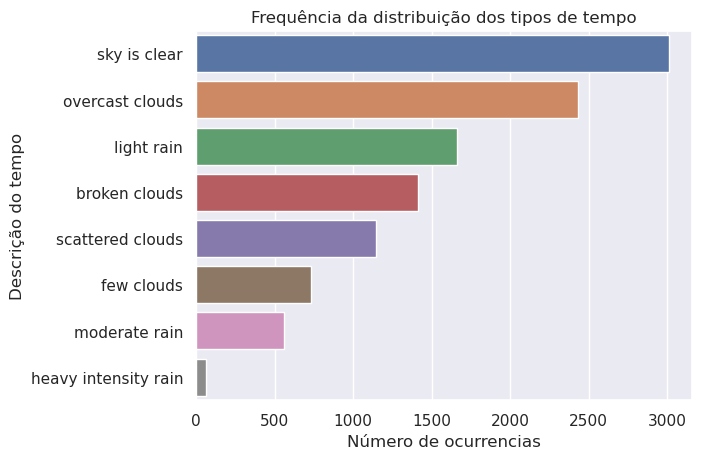

In [40]:
weather_count = df_train_v1['weather_description'].value_counts()
sns.set(style='darkgrid')
sns.barplot(y=weather_count.index, x=weather_count.values)
plt.title('Frequência da distribuição dos tipos de tempo')
plt.xlabel('Número de ocurrencias', fontsize=12)
plt.ylabel('Descrição do tempo', fontsize=12)
plt.show()

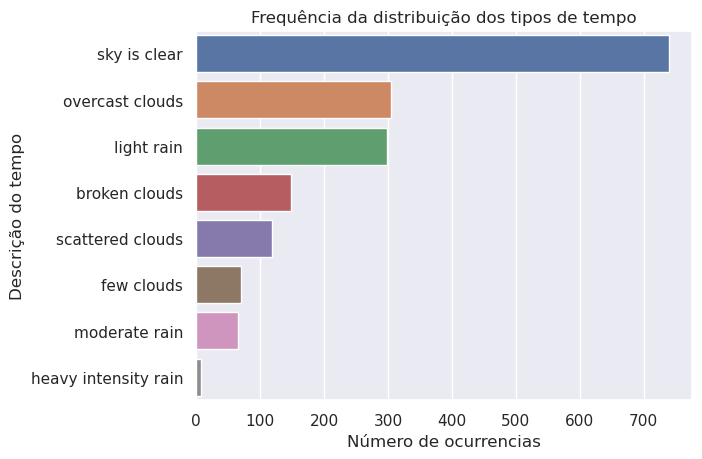

In [41]:
weather_count = df_teste_v1['weather_description'].value_counts()
sns.set(style='darkgrid')
sns.barplot(y=weather_count.index, x=weather_count.values)
plt.title('Frequência da distribuição dos tipos de tempo')
plt.xlabel('Número de ocurrencias', fontsize=12)
plt.ylabel('Descrição do tempo', fontsize=12)
plt.show()

In [42]:
df_train_v1.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,date_year,date_month,date_day,date_hour
0,0.0,0.0,0.0,NaN,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,overcast clouds,2021,9,29,0
1,0.0,0.0,0.0,NaN,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,overcast clouds,2021,9,29,1
2,0.0,0.0,0.0,NaN,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,overcast clouds,2021,9,29,2
3,0.0,0.0,0.0,NaN,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,overcast clouds,2021,9,29,3
4,0.0,0.0,0.0,NaN,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,overcast clouds,2021,9,29,4


Utilização do binary encode devido ao facto que com esta estrategia apenas aumentamos o número de colunas em 3 enquanto que com um label encode seria necessária pelo menos 7 colunas novas

In [43]:
df_train_v1['weather_description'].value_counts()

weather_description
sky is clear            3010
overcast clouds         2430
light rain              1662
broken clouds           1413
scattered clouds        1148
few clouds               731
moderate rain            562
heavy intensity rain      60
Name: count, dtype: int64

In [44]:
replace_map = {'weather_description': {'sky is clear': 0, 'overcast clouds': 1, 'light rain': 2, 'broken clouds': 3, 'scattered clouds': 4,'few clouds':5,'moderate rain':6,'heavy intensity rain':7}}

In [47]:
labels = df_train_v1['weather_description'].astype('category').cat.categories.tolist()
replace_map_comp = {'weather_description': {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df_train_v1.replace(replace_map_comp, inplace=True)

In [48]:
df_train_v1

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,date_year,date_month,date_day,date_hour
0,0.000,0.000,0.0,NaN,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,6,2021,9,29,0
1,0.000,0.000,0.0,NaN,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,6,2021,9,29,1
2,0.000,0.000,0.0,NaN,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,6,2021,9,29,2
3,0.000,0.000,0.0,NaN,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,6,2021,9,29,3
4,0.000,0.000,0.0,NaN,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,6,2021,9,29,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1.693,0.000,0.0,NaN,15.70,15.57,15.57,15.72,1018,86,5.56,3.58,100,5,2022,12,31,19
11012,1.327,0.000,0.0,NaN,15.55,15.43,12.72,15.70,1018,87,4.47,4.20,100,3,2022,12,31,20
11013,0.757,0.000,0.0,NaN,13.45,13.28,12.23,13.99,1019,93,3.29,4.23,100,3,2022,12,31,21
11014,0.000,0.675,0.0,NaN,12.93,12.73,12.23,13.43,1019,94,1.49,3.90,100,5,2022,12,31,22


<Axes: >

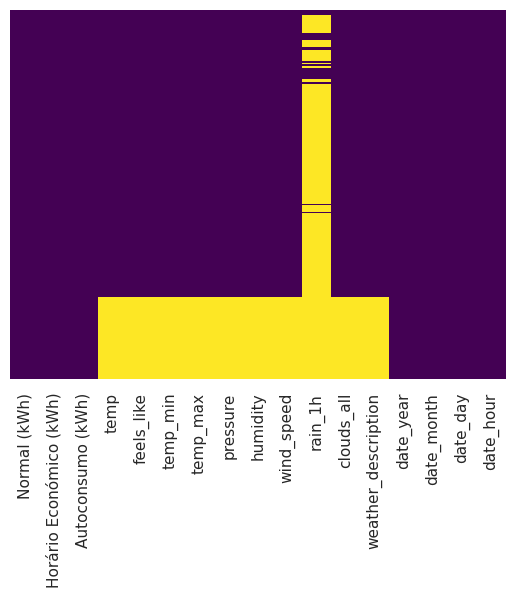

In [40]:
sns.heatmap(df_teste_v1.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [49]:
labels = df_teste_v1['weather_description'].astype('category').cat.categories.tolist()
replace_map_comp = {'weather_description': {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df_teste_v1.replace(replace_map_comp, inplace=True)

<Axes: >

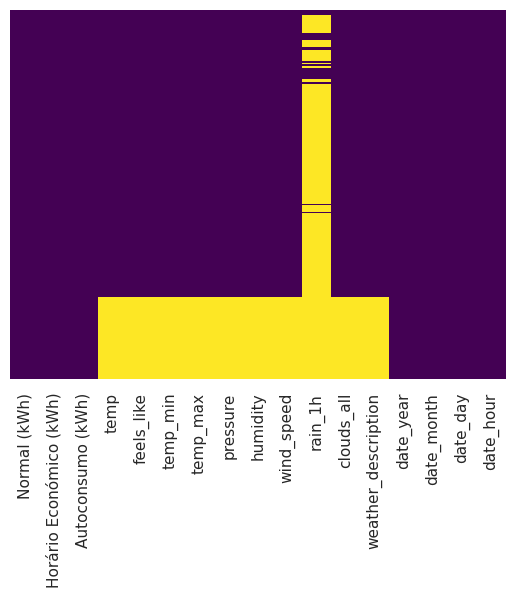

In [50]:
sns.heatmap(df_teste_v1.isnull(),yticklabels=False, cbar=False, cmap='viridis')

coluna 'Injeção na rede (kWh)'

In [51]:
df_train_v1['Injeção na rede (kWh)'].value_counts()

Injeção na rede (kWh)
High         1103
Medium       1098
Very High     606
Low           432
Name: count, dtype: int64

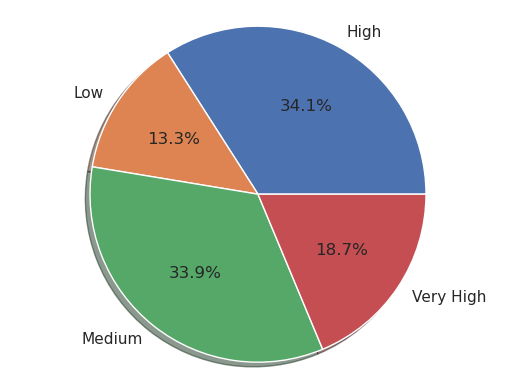

In [52]:
labels = df_train_v1['Injeção na rede (kWh)'].astype('category').cat.categories.tolist()
counts = df_train_v1['Injeção na rede (kWh)'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [53]:
#sns.pairplot(df_train_v1,hue='Injeção na rede (kWh)')

In [54]:
replace_map = {'Injeção na rede (kWh)': {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}}

In [55]:
labels = df_train_v1['Injeção na rede (kWh)'].astype('category').cat.categories.tolist()
replace_map_comp = {'Injeção na rede (kWh)': {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_comp)
df_train_v1.info()

{'Injeção na rede (kWh)': {'High': 1, 'Low': 2, 'Medium': 3, 'Very High': 4}}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    3239 non-null   object 
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   pressure                 11016 non-null  int64  
 9   humidity                 11016 non-null  int64  
 10  wind_speed               11016 non-null  float64
 11  rain_1h                  2284 non-null   float64
 12  clouds_all               11016 non-null  int64  
 13

In [56]:
df_train_v1['Injeção na rede (kWh)'].fillna(0, inplace=True)
df_train_v1.replace(replace_map_comp, inplace=True)
df_train_v1

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,date_year,date_month,date_day,date_hour
0,0.000,0.000,0.0,0,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,6,2021,9,29,0
1,0.000,0.000,0.0,0,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,6,2021,9,29,1
2,0.000,0.000,0.0,0,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,6,2021,9,29,2
3,0.000,0.000,0.0,0,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,6,2021,9,29,3
4,0.000,0.000,0.0,0,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,6,2021,9,29,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1.693,0.000,0.0,0,15.70,15.57,15.57,15.72,1018,86,5.56,3.58,100,5,2022,12,31,19
11012,1.327,0.000,0.0,0,15.55,15.43,12.72,15.70,1018,87,4.47,4.20,100,3,2022,12,31,20
11013,0.757,0.000,0.0,0,13.45,13.28,12.23,13.99,1019,93,3.29,4.23,100,3,2022,12,31,21
11014,0.000,0.675,0.0,0,12.93,12.73,12.23,13.43,1019,94,1.49,3.90,100,5,2022,12,31,22


In [57]:
print(df_train_v1['Injeção na rede (kWh)'].dtypes)

int64


In [58]:
print(df_train_v1['Injeção na rede (kWh)'].value_counts())

Injeção na rede (kWh)
0    7777
1    1103
3    1098
4     606
2     432
Name: count, dtype: int64


In [59]:
df_train_v2=df_train_v1.copy()
df_teste_v2=df_teste_v1.copy()

### Substituir valores em falta

Vamos prencher com 0 os restantes missing values presentes nas colunas 'Injeção na rede' e 'rain_1h', uma vez que o significado destas colunas permitem o mesmo.

In [60]:
df_train_v1['rain_1h'].fillna(0.0,inplace=True)
df_train_v1

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,date_year,date_month,date_day,date_hour
0,0.000,0.000,0.0,0,13.97,13.54,11.45,14.04,1027,81,1.96,0.00,87,6,2021,9,29,0
1,0.000,0.000,0.0,0,13.48,13.02,13.43,13.90,1028,82,1.83,0.00,91,6,2021,9,29,1
2,0.000,0.000,0.0,0,12.93,12.47,12.72,13.43,1027,84,1.96,0.00,93,6,2021,9,29,2
3,0.000,0.000,0.0,0,12.61,12.15,10.34,12.93,1027,85,1.85,0.00,95,6,2021,9,29,3
4,0.000,0.000,0.0,0,12.61,12.17,9.79,12.93,1027,86,1.83,0.00,93,6,2021,9,29,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1.693,0.000,0.0,0,15.70,15.57,15.57,15.72,1018,86,5.56,3.58,100,5,2022,12,31,19
11012,1.327,0.000,0.0,0,15.55,15.43,12.72,15.70,1018,87,4.47,4.20,100,3,2022,12,31,20
11013,0.757,0.000,0.0,0,13.45,13.28,12.23,13.99,1019,93,3.29,4.23,100,3,2022,12,31,21
11014,0.000,0.675,0.0,0,12.93,12.73,12.23,13.43,1019,94,1.49,3.90,100,5,2022,12,31,22


In [61]:
df_teste_v1['rain_1h'].fillna(0.0,inplace=True)
df_teste_v1

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,date_year,date_month,date_day,date_hour
0,0.000,0.467,0.000,12.93,12.76,12.72,13.43,1019.0,95.0,2.02,3.72,100.0,5.0,2023,1,1,0
1,0.000,0.577,0.000,13.49,13.38,13.43,13.90,1018.0,95.0,2.18,3.26,100.0,5.0,2023,1,1,1
2,0.000,0.346,0.000,13.55,13.44,13.48,14.82,1017.0,95.0,2.88,2.44,100.0,5.0,2023,1,1,2
3,0.000,0.270,0.000,13.61,13.51,12.01,14.82,1016.0,95.0,3.63,1.74,100.0,5.0,2023,1,1,3
4,0.000,0.252,0.000,13.59,13.49,12.01,14.82,1015.0,95.0,4.58,1.13,100.0,5.0,2023,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,0.953,0.000,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,2023,4,4,19
2252,0.915,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,2023,4,4,20
2253,0.479,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,2023,4,4,21
2254,0.000,0.497,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,2023,4,4,22


<Axes: >

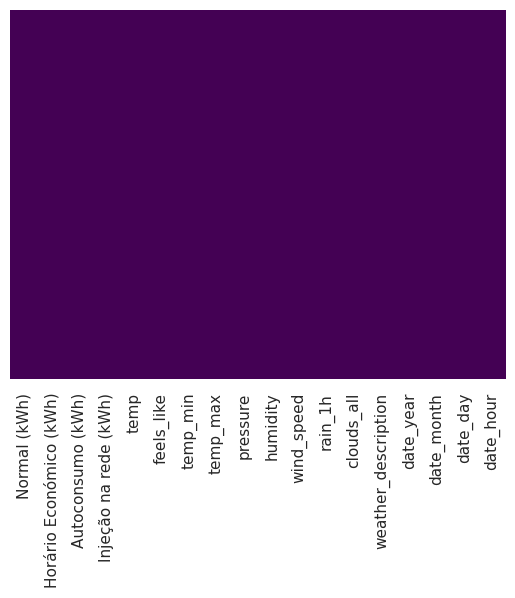

In [62]:
sns.heatmap(df_train_v1.isnull(),yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

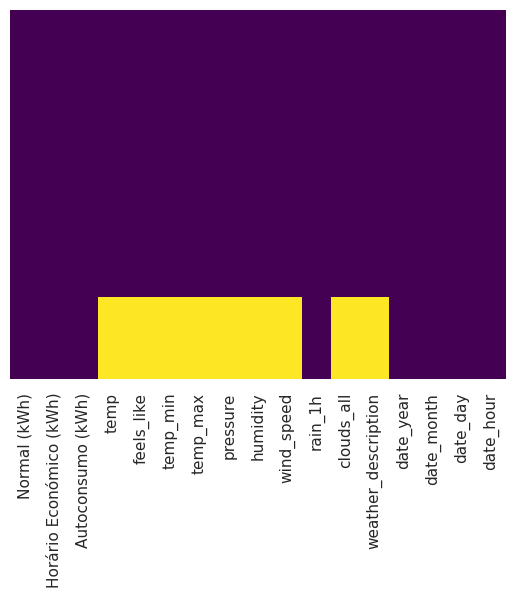

In [63]:
sns.heatmap(df_teste_v1.isnull(),yticklabels=False, cbar=False, cmap='viridis')

## Análise exploratoria de dados

In [64]:
df_train_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  int64  
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   pressure                 11016 non-null  int64  
 9   humidity                 11016 non-null  int64  
 10  wind_speed               11016 non-null  float64
 11  rain_1h                  11016 non-null  float64
 12  clouds_all               11016 non-null  int64  
 13  weather_description      11016 non-null  int64  
 14  date_year             

fig = plt.figure(figsize=(10,10))
inj_corr = df_train_v1.corr(method='pearson')
sns.heatmap(inj_corr,linecolor='black',linewidth=0.5)

<Axes: >

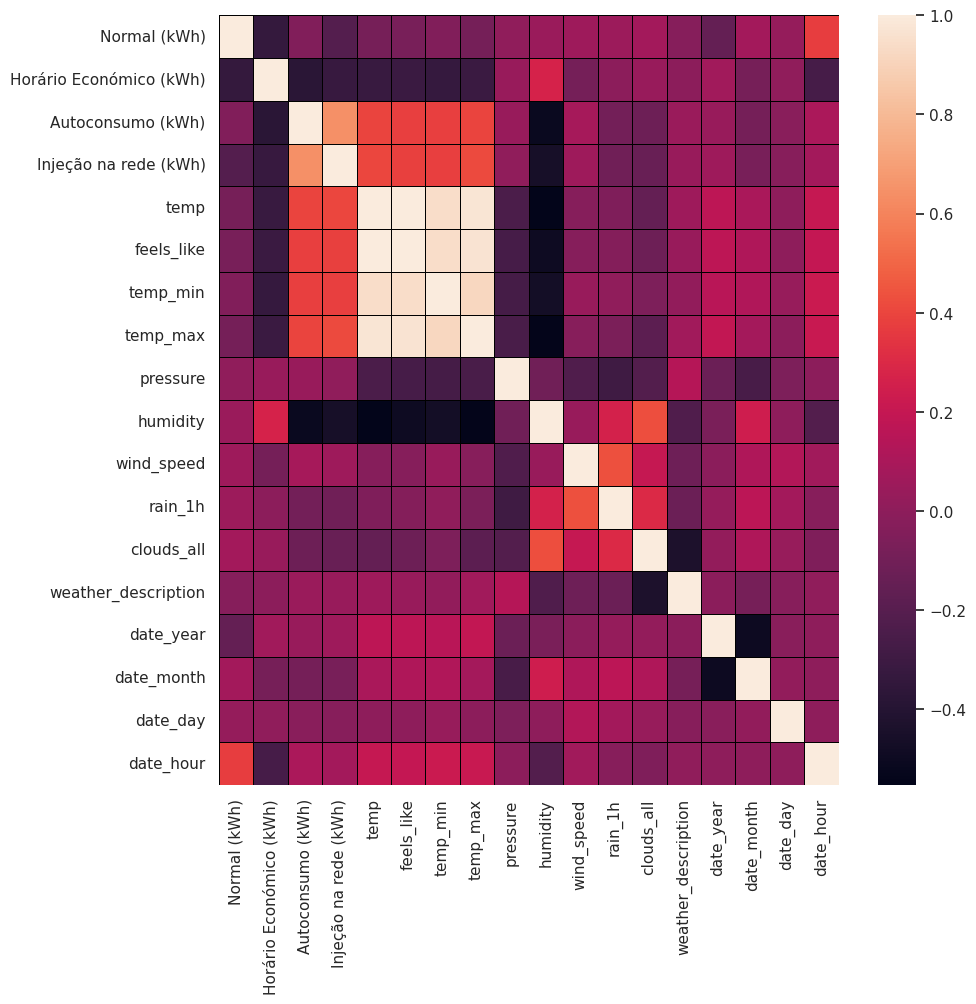

In [65]:
fig = plt.figure(figsize=(10,10))
inj_corr = df_train_v1.corr(method='pearson')
sns.heatmap(inj_corr,linecolor='black',linewidth=0.5)

## Preencher null

In [58]:
df_teste_v2.drop(['temp_min','temp_max','feels_like'], axis=1, inplace=True)

In [109]:
df_train_v2=df_train_v1.copy()

In [110]:
df_train_v2.drop(['temp_min','temp_max','feels_like'], axis=1, inplace=True)

<Axes: >

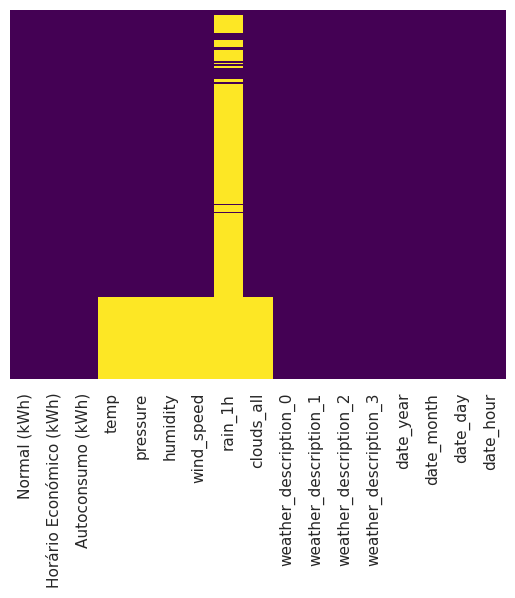

In [59]:
sns.heatmap(df_teste_v2.isnull(),yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='date_month', ylabel='temp'>

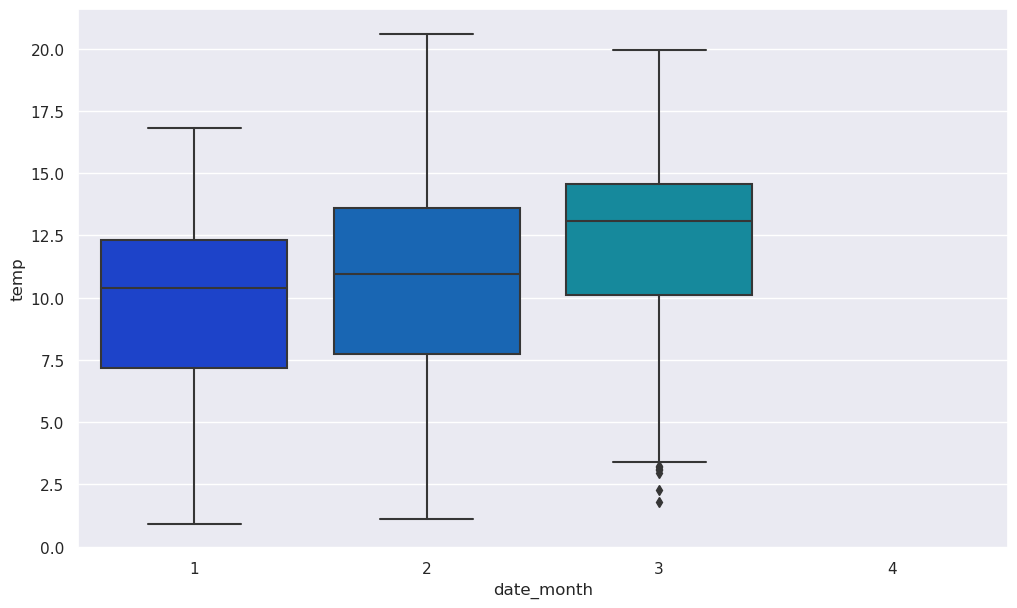

In [60]:
plt.figure(figsize=(12,7))
sns.boxplot(x='date_month',y='temp',data=df_teste_v2,palette='winter')

In [61]:
medias_por_mes = df_teste_v2.groupby('date_month')['temp'].mean()

print(medias_por_mes)

date_month
1     9.658535
2    10.894940
3    12.092738
4          NaN
Name: temp, dtype: float64


In [62]:
def impute_age(cols):
    temp = cols[0]
    date_month = cols[1]
    
    if pd.isnull(temp):

        if date_month == 1:
            return 9.658535

        elif date_month == 2:
            return 10.894940

        else:
            return 12.092738

    else:
        return temp

In [63]:
df_teste_v2['temp'] = df_teste_v2[['temp','date_month']].apply(impute_age,axis=1)

<Axes: xlabel='date_month', ylabel='pressure'>

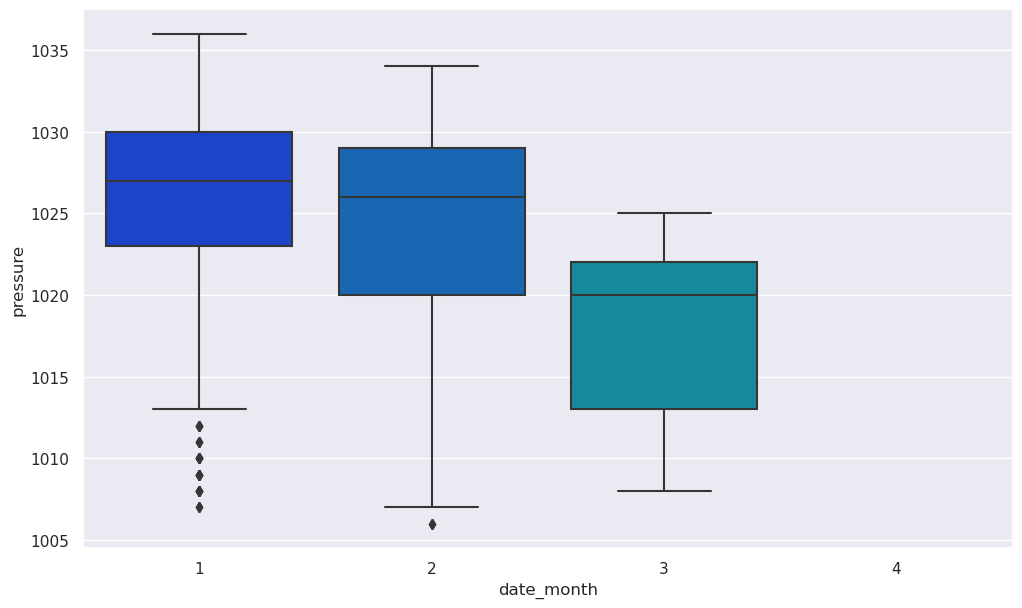

In [64]:
plt.figure(figsize=(12,7))
sns.boxplot(x='date_month',y='pressure',data=df_teste_v2,palette='winter')

In [65]:
medias_por_mes = df_teste_v2.groupby('date_month')['pressure'].mean()

print(medias_por_mes)

date_month
1    1025.327957
2    1024.125000
3    1018.169643
4            NaN
Name: pressure, dtype: float64


In [66]:
def impute_pressure(cols):
    pressure = cols[0]
    date_month = cols[1]
    
    if pd.isnull(pressure):

        if date_month == 1:
            return 1025.327957

        elif date_month == 2:
            return 1024.125000

        else:
            return 1018.169643

    else:
        return pressure

In [67]:
df_teste_v2['pressure'] = df_teste_v2[['pressure','date_month']].apply(impute_pressure,axis=1)

<Axes: xlabel='date_month', ylabel='humidity'>

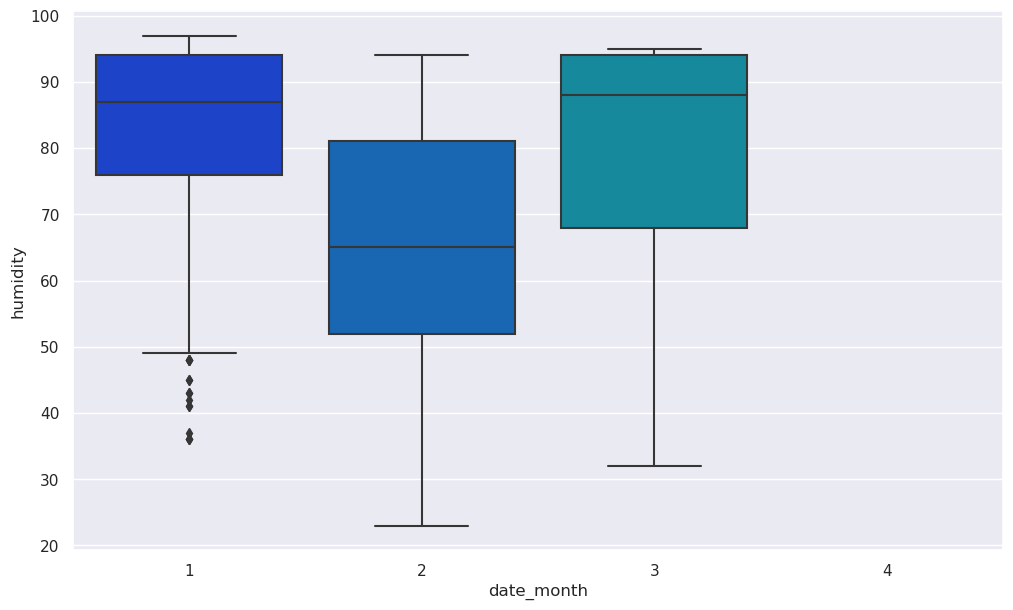

In [68]:
plt.figure(figsize=(12,7))
sns.boxplot(x='date_month',y='humidity',data=df_teste_v2,palette='winter')

In [69]:
medias_por_mes = df_teste_v2.groupby('date_month')['humidity'].mean()

print(medias_por_mes)

date_month
1    82.756720
2    65.528274
3    80.104167
4          NaN
Name: humidity, dtype: float64


In [70]:
def impute_humidity(cols):
    humidity = cols[0]
    date_month = cols[1]
    
    if pd.isnull(humidity):

        if date_month == 1:
            return 82.756720

        elif date_month == 2:
            return 65.528274

        else:
            return 80.104167

    else:
        return humidity

In [71]:
df_teste_v2['humidity'] = df_teste_v2[['humidity','date_month']].apply(impute_humidity,axis=1)

<Axes: xlabel='date_month', ylabel='wind_speed'>

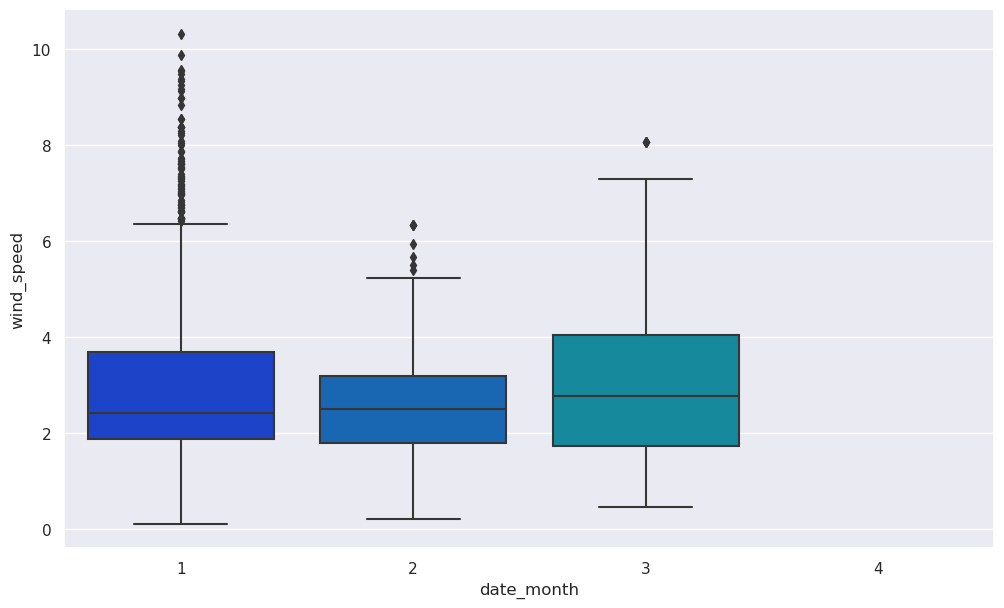

In [93]:
plt.figure(figsize=(12,7))
sns.boxplot(x='date_month',y='wind_speed',data=df_teste_v2,palette='winter')

In [94]:
medias_por_mes = df_teste_v2.groupby('date_month')['wind_speed'].mean()

print(medias_por_mes)

date_month
1    3.074086
2    2.539732
3    3.097470
4         NaN
Name: wind_speed, dtype: float64


In [95]:
def impute_wind_speed(cols):
    wind_speed = cols[0]
    date_month = cols[1]
    
    if pd.isnull(wind_speed):

        if date_month == 1:
            return 3.074086

        elif date_month == 2:
            return 2.539732

        else:
            return 3.097470

    else:
        return wind_speed

In [96]:
df_teste_v2['wind_speed'] = df_teste_v2[['wind_speed','date_month']].apply(impute_wind_speed,axis=1)

<Axes: xlabel='date_month', ylabel='clouds_all'>

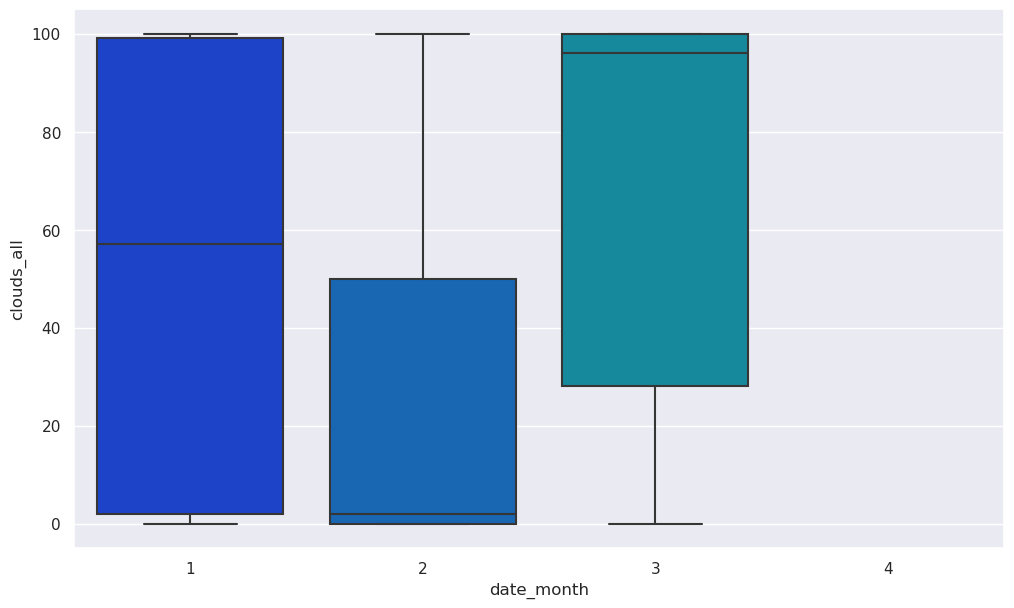

In [98]:
plt.figure(figsize=(12,7))
sns.boxplot(x='date_month',y='clouds_all',data=df_teste_v2,palette='winter')

In [99]:
medias_por_mes = df_teste_v2.groupby('date_month')['clouds_all'].mean()

print(medias_por_mes)

date_month
1    51.548387
2    24.854167
3    68.130952
4          NaN
Name: clouds_all, dtype: float64


In [100]:
def impute_clouds_all(cols):
    clouds_all = cols[0]
    date_month = cols[1]
    
    if pd.isnull(clouds_all):

        if date_month == 1:
            return 3.074086

        elif date_month == 2:
            return 2.539732

        else:
            return 3.097470

    else:
        return clouds_all

In [101]:
df_teste_v2['clouds_all'] = df_teste_v2[['clouds_all','date_month']].apply(impute_clouds_all,axis=1)

In [127]:
df_teste_v2.drop(['rain_1h'], axis=1, inplace=True)

In [128]:
df_train_v2.drop(['rain_1h'], axis=1, inplace=True)

<Axes: >

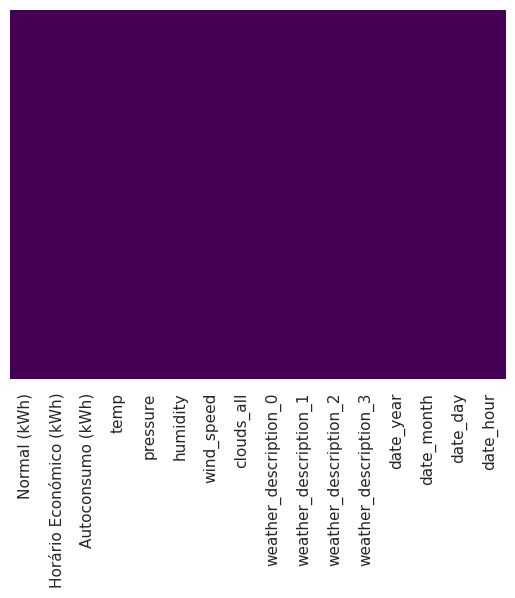

In [129]:
sns.heatmap(df_teste_v2.isnull(),yticklabels=False, cbar=False, cmap='viridis')

## Decision tree classifier

In [96]:
df_train_v3 = df_train_v1.drop(df_train_v1[(df_train_v1['date_month'] != 1)&(df_train_v1['date_month'] != 2)&(df_train_v1['date_month'] != 3)].index)

In [98]:
df_train_v3['date_month'].describe()

count    2160.000000
mean        2.000000
std         0.830186
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: date_month, dtype: float64

In [99]:
X_train = df_train_v3.drop(['Injeção na rede (kWh)'],axis=1)

In [100]:
y_train = df_train_v3['Injeção na rede (kWh)'].to_frame()

In [101]:
X_teste = df_teste_v1.copy()

In [102]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=2023)

In [103]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2023)

In [104]:
predictions = clf.predict(X_teste)

In [105]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [106]:
predictions.size

2256

In [107]:
predictions_tofile=pd.DataFrame(predictions)

In [108]:
predictions_tofile

,0
0,0
1,0
2,0
3,0
4,0
...,...
2251,0
2252,0
2253,0
2254,0


In [109]:
predictions_tofile.index = predictions_tofile.index + 1
predictions_tofile['RowId'] = predictions_tofile.index

In [110]:
predictions_tofile

,0,RowId
1,0,1
2,0,2
3,0,3
4,0,4
5,0,5
...,...,...
2252,0,2252
2253,0,2253
2254,0,2254
2255,0,2255


In [111]:
predictions_tofile.columns = ['Result','RowId']

In [112]:
replace_map_final = {0:'None', 1: 'Low', 2: 'Medium',3: 'High',4: 'Very High'}

In [113]:
predictions_tofile['Result'] = predictions_tofile['Result'].map(replace_map_final)

In [114]:
predictions_tofile.to_csv('res5.csv', index=False, sep=',', columns=['RowId','Result'])

## Logistic regression

In [147]:
from sklearn.linear_model import LogisticRegression

In [148]:
y_train

,Injeção na rede (kWh)
0,0
1,0
2,0
3,0
4,0
...,...
11011,0
11012,0
11013,0
11014,0


In [149]:
logmodel1 = LogisticRegression(random_state=2023, solver='newton-cg')
logmodel1.fit(X_train,y_train)

/home/rui/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rui/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(random_state=2023, solver='newton-cg')

In [150]:
predictions2 = logmodel1.predict(X_teste)

In [151]:
predictions_tofile2=pd.DataFrame(predictions2)
predictions_tofile2.index = predictions_tofile2.index + 1
predictions_tofile2['RowId'] = predictions_tofile2.index
predictions_tofile2.columns = ['Result','RowId']
predictions_tofile2['Result'] = predictions_tofile2['Result'].map(replace_map_final)

In [152]:
predictions_tofile2.to_csv('res4.csv', index=False, sep=',', columns=['RowId','Result'])